<a href="https://colab.research.google.com/github/berradimeriemencg/22007719-BERRADI-MERIEM-/blob/main/ML10_12_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Bibliothèques importées.

2. Données chargées : 178 lignes / 14 colonnes
   Classes : ['class_0' 'class_1' 'class_2']

3. Génération de valeurs manquantes artificielles...
   Total NaN générés : 156

4. Nettoyage des données...
   NaN restants après imputation : 0

5. EDA...

   Statistiques descriptives des 5 premières colonnes :
          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium
count  178.000000  178.000000  178.000000         178.000000  178.000000
mean    12.985301    2.353614    2.370060          19.538554   99.566265
std      0.782572    1.087560    0.264147           3.236683   13.637927
min     11.030000    0.740000    1.360000          10.600000   78.000000
25%     12.370000    1.630000    2.240000          17.425000   88.250000
50%     12.985301    1.935000    2.370060          19.538554   98.000000
75%     13.610000    2.982500    2.527500          21.500000  106.000000
max     14.830000    5.800000    3.230000          30.000000  162.000000


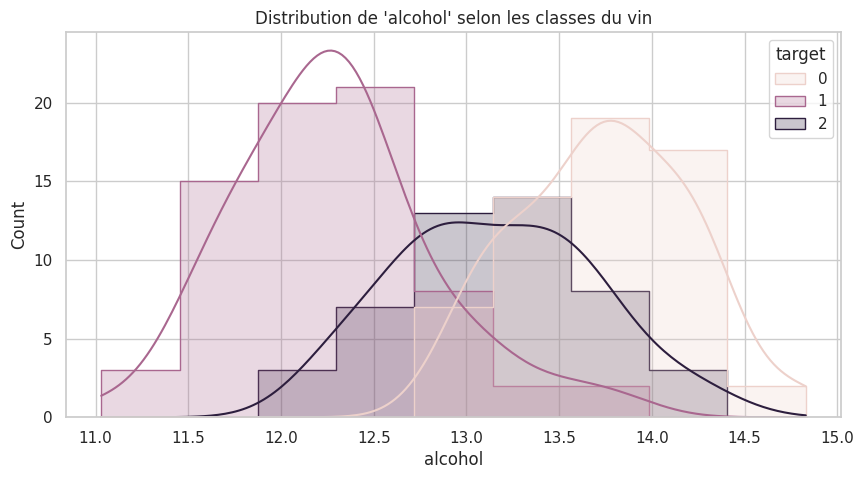

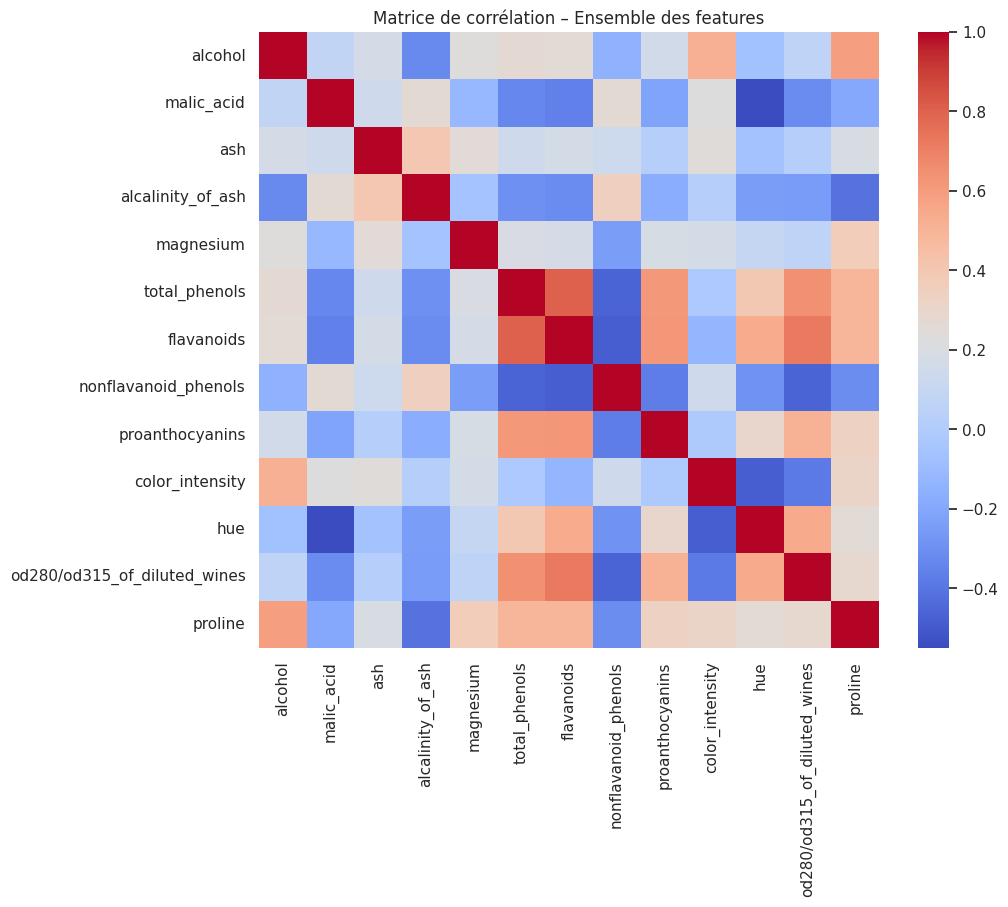


6. Séparation effectuée :
   Train : 142 lignes
   Test : 36 lignes

7. Entraînement du modèle Random Forest...
   Modèle entraîné.

8. Évaluation...
   Score Accuracy : 97.22%

   >>> Rapport de classification :
              precision    recall  f1-score   support

     class_0       1.00      0.93      0.96        14
     class_1       0.93      1.00      0.97        14
     class_2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



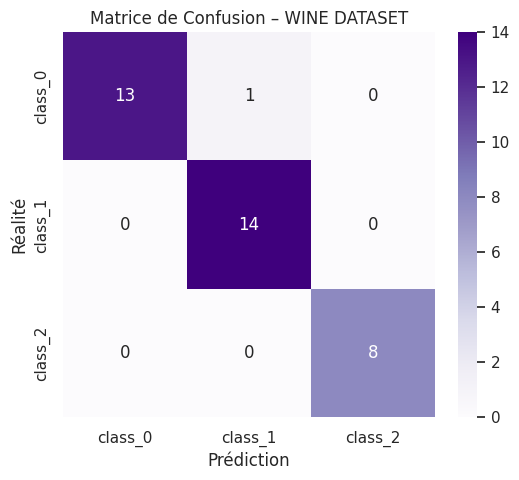


--- FIN DU SCRIPT ---


In [1]:
# ==============================================================================
# COURS DATA SCIENCE : CYCLE DE VIE COMPLET (SCRIPT PÉDAGOGIQUE)
# Dataset utilisé : WINE RECOGNITION (classification multiclass)
# ==============================================================================

# ------------------------------------------------------------------------------
# 1. IMPORTATION DES BIBLIOTHÈQUES
# ------------------------------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

sns.set_theme(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')

print("1. Bibliothèques importées.\n")

# ------------------------------------------------------------------------------
# 2. CHARGEMENT DU DATASET
# ------------------------------------------------------------------------------
data = load_wine()

df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

print(f"2. Données chargées : {df.shape[0]} lignes / {df.shape[1]} colonnes")
print(f"   Classes : {data.target_names}\n")

# ------------------------------------------------------------------------------
# 3. SIMULATION DE DONNÉES MANQUANTES
# ------------------------------------------------------------------------------
print("3. Génération de valeurs manquantes artificielles...")

df_dirty = df.copy()
np.random.seed(42)

for col in df.columns[:-1]:  # on exclut la target
    df_dirty.loc[df_dirty.sample(frac=0.07).index, col] = np.nan  # 7%

print(f"   Total NaN générés : {df_dirty.isnull().sum().sum()}\n")

# ------------------------------------------------------------------------------
# 4. NETTOYAGE DES DONNÉES
# ------------------------------------------------------------------------------
print("4. Nettoyage des données...")

X = df_dirty.drop("target", axis=1)
y = df_dirty["target"]

imputer = SimpleImputer(strategy="mean")
X_clean = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

print(f"   NaN restants après imputation : {X_clean.isnull().sum().sum()}\n")

# ------------------------------------------------------------------------------
# 5. ANALYSE EXPLORATOIRE (EDA)
# ------------------------------------------------------------------------------
print("5. EDA...")

print("\n   Statistiques descriptives des 5 premières colonnes :")
print(X_clean.iloc[:, :5].describe())

# --- GRAPHIQUE 1 : DISTRIBUTION D'UNE VARIABLE ---
plt.figure(figsize=(10, 5))
selected_feature = "alcohol"
sns.histplot(data=df, x=selected_feature, hue="target", kde=True, element="step")
plt.title(f"Distribution de '{selected_feature}' selon les classes du vin")
plt.show()

# --- HEATMAP DE CORRÉLATION ---
plt.figure(figsize=(10, 8))
sns.heatmap(X_clean.corr(), cmap="coolwarm", annot=False)
plt.title("Matrice de corrélation – Ensemble des features")
plt.show()

# ------------------------------------------------------------------------------
# 6. TRAIN / TEST SPLIT
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y, test_size=0.2, random_state=42
)

print("\n6. Séparation effectuée :")
print(f"   Train : {X_train.shape[0]} lignes")
print(f"   Test : {X_test.shape[0]} lignes\n")

# ------------------------------------------------------------------------------
# 7. MODÉLISATION
# ------------------------------------------------------------------------------
print("7. Entraînement du modèle Random Forest...")

model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)

print("   Modèle entraîné.\n")

# ------------------------------------------------------------------------------
# 8. ÉVALUATION DES PERFORMANCES
# ------------------------------------------------------------------------------
print("8. Évaluation...")

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"   Score Accuracy : {acc*100:.2f}%")

print("\n   >>> Rapport de classification :")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# --- MATRICE DE CONFUSION ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Purples",
    xticklabels=data.target_names, yticklabels=data.target_names
)
plt.title("Matrice de Confusion – WINE DATASET")
plt.xlabel("Prédiction")
plt.ylabel("Réalité")
plt.show()

print("\n--- FIN DU SCRIPT ---")
